In [1]:
from matplotlib import rc
# rc('font', **{'size':12})
# rc('text', usetex=True)
# rc('xtick', labelsize=12) 
# rc('ytick', labelsize=12) 
# rc('axes', titlesize=16)    # fontsize of the axes title
# rc('axes', labelsize=12)    # fontsize of the x and y labels
from xmovie import Movie 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# from matplotlib.path import Path
from matplotlib.patches import PathPatch
import timeit

from scipy.fft import fft,fftfreq

import numpy as np
from netCDF4 import Dataset
import os
import xarray as xr
from xgcm import Grid
from dask.distributed import Client
import dask.array as da
import cmocean.cm as cm                              # Nice colormaps
from collections import OrderedDict               # We often use this to organise our experiments
import cftime                                     # In case you need to work with time axes


from dask.distributed import Client
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41781 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/41781/status,
Dashboard: /proxy/41781/status,Workers: 7
Total threads: 14,Total memory: 56.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36163,Workers: 7
Dashboard: /proxy/41781/status,Total threads: 14
Started: Just now,Total memory: 56.00 GiB
Comm: tcp://127.0.0.1:44557,Total threads: 2
Dashboard: /proxy/38727/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:41445,


In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Figure out where to put our slice

AttributeError: module 'cmocean.cm' has no attribute 'cm'

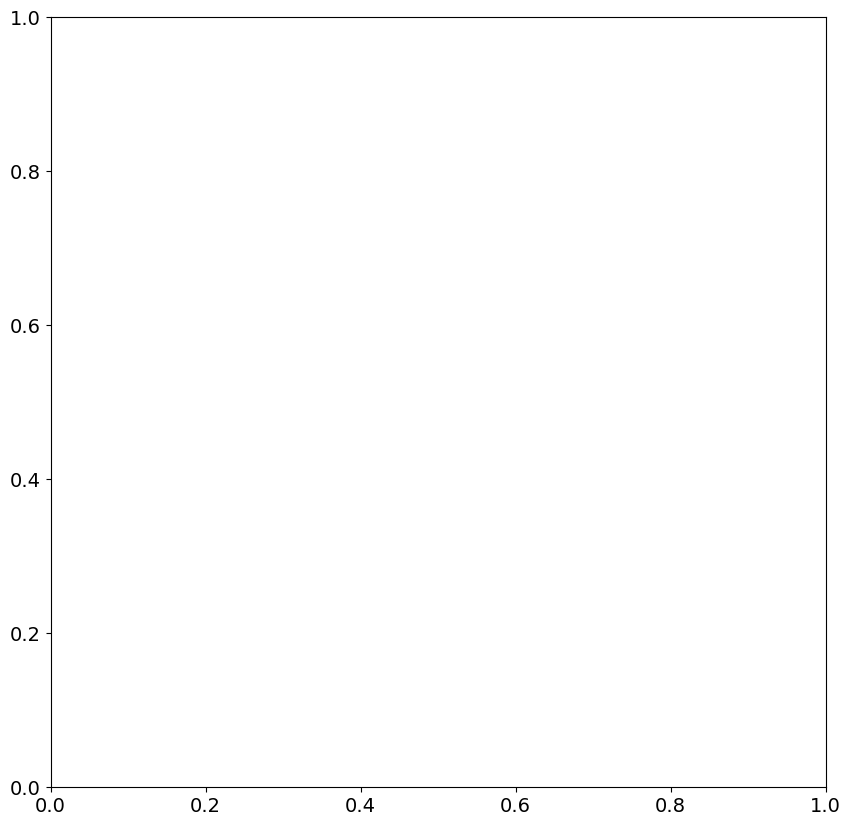

In [24]:
%matplotlib inline

expt = "blank-ttide-20"
movietitle = "hourly_deepspeed-mixed.mp4"

# e = xr.open_mfdataset(f"/g/data/nm03/ab8992/oldruns/blank-ttide-20/outputs/output013/*hourly_e.nc",decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yh = slice(-52,-30))

v = xr.open_mfdataset(f"/g/data/nm03/ab8992/oldruns/blank-ttide-20/outputs/output013/*hourly_v.nc",decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yq = slice(-52,-30))
u = xr.open_mfdataset(f"/g/data/nm03/ab8992/oldruns/blank-ttide-20/outputs/output013/*hourly_u.nc",decode_times = False, parallel = True,chunks = "auto").sel(xq = slice(145,175),yh = slice(-52,-30))



speed = np.sqrt((v.interp({"yq":u.yh.values}).rename({"yq":"yh"})**2).v + (u.interp({"xq":v.xh.values}).rename({"xq":"xh"})**2).u).isel(time = 50).load()
# e = e.e.isel(time = 50).load()


fig,ax = plt.subplots(figsize = (10,10))
speed.plot(ax = ax,vmax = 0.2,cmap = cm.cm.speed)
ax.plot([148,165],[-41.0,-47.5],color = "red",linewidth = 1)
ax.plot([148,165],[-43.3,-49.8],color = "red",linewidth = 1)

## Drafts of functions to be moved to postprocessing.py




In [26]:
# Calculate bearing between two lat long points
def bearing(lat1,lon1,lat2,lon2):
    """
    Calculates bearing between two lat long points

    Parameters
    ----------
    lat1 : float
        Latitude of first point
    lon1 : float
        Longitude of first point
    lat2 : float
        Latitude of second point
    lon2 : float
        Longitude of second point
    """
    lat1 = lat1 * np.pi / 180
    lat2 = lat2 * np.pi / 180
    lon1 = lon1 * np.pi / 180
    lon2 = lon2 * np.pi / 180
    y = np.sin(lon2-lon1) * np.cos(lat2)
    x = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(lon2-lon1)
    return np.arctan2(y,x) * 180 / np.pi

In [11]:
# def get_transect_data(path,vector = np.array([[150,-49.8],[165,-43.3]])):
#     """
#     Returns a dataset containing 4D hourly transect data along beam path

#     Parameters
#     ----------
#     output_path : Path object
#         Path to output directory containing MOM6 output
#     vector : np.array
#         Array containing two points in longitude, latitude space that define the beam path
#     """
from pathlib import Path

path = Path("/g/data/nm03/ab8992/oldruns/blank-ttide-20/outputs/output013")
vector = np.array([[150,-49.8],[165,-43.3]])
beamwidth = 5



##################################

# Need to modify longitude to ensure we're comparing distances correctly
longitude_factor = np.cos(-47.5 * np.pi / 180)

dist = 1352 #! Hardcoded length of the transect. Pending decision of how to handle non-uniformality of the distnaces along transect

# Angle from horizontal to the beam path
theta = bearing(vector[0,1],vector[0,0],vector[1,1],vector[1,0])
ctheta = np.cos(theta)
stheta = np.sin(theta)

# Coners, clockwise from North West

# xb and yb are in kilometers and evenly spaced along the transect
xb = np.arange(vec - )

corners = np.array([[vector[0,0] - 0.5 * ctheta * beamwidth * longitude_factor,vector[0,1] - 0.5 * beamwidth],
                 


h = xr.open_mfdataset(str(path) + "*/hourly_h.nc",decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yh = slice(-52,-30))
# v = xr.open_mfdataset(str(path) + "*/hourly_v.nc",decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yq = slice(-52,-30))
# u = xr.open_mfdataset(str(path) + "*/hourly_u.nc",decode_times = False, parallel = True,chunks = "auto").sel(xq = slice(145,175),yh = slice(-52,-30))
# isop = xr.open_mfdataset(str(path) + "*/hourly_e.nc",decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yh = slice(-52,-30))

# Construct new hgrid for transect

x


2023-10-09 10:25:45,432 - distributed.worker - WARNING - Compute Failed
Key:       open_dataset-1333ce25-f721-4ea7-8bcf-28a07c6a5918
Function:  execute_task
args:      ((<function apply at 0x15295c175b80>, <function open_dataset at 0x15293ec68dc0>, ['/g/data/nm03/ab8992/oldruns/blank-ttide-20/outputs/output013/*hourly_h.nc'], (<class 'dict'>, [['engine', None], ['chunks', 'auto'], ['decode_times', False]])))
kwargs:    {}
Exception: "FileNotFoundError(2, 'No such file or directory')"



FileNotFoundError: [Errno 2] No such file or directory: b'/g/data/nm03/ab8992/oldruns/blank-ttide-20/outputs/output013/*hourly_h.nc'

In [25]:
print(np.cos(-45.5 * np.pi / 180))
print(np.cos(-50.5 * np.pi / 180))


0.7009092642998509
0.636078220277764


In [21]:
p = path.resolve() / "*.hourly_h.nc"
str(path)

'/g/data/nm03/ab8992/oldruns/blank-ttide-20/outputs/output013'

In [23]:
path = Path("/g/data/nm03/ab8992/oldruns/blank-ttide-20/outputs/output013")



h = xr.open_mfdataset(str(path) + "/*hourly_h.nc",decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yh = slice(-52,-30))


In [56]:
outputs = ["011","012"]
expt="testtides-20"
basepath = f"/home/149/ab8992/mom6_rundirs/ttide/{expt}/archive/output?({'|'.join(outputs)})/*hourly_h.nc"
print(basepath)

import glob
glob.glob(f"/home/149/ab8992/mom6_rundirs/ttide/{expt}/archive/output012/*hourly")


/home/149/ab8992/mom6_rundirs/ttide/testtides-20/archive/output?(011|012)/*hourly_h.nc


[]

In [69]:
a = subprocess.run(f"shopt -s extglob \n ls {basepath}",shell=True,capture_output=True)
b = a.stdout.decode("utf-8") 
b.rstrip().split("\n")

['/home/149/ab8992/mom6_rundirs/ttide/testtides-20/archive/output011/20150501.hourly_h.nc',
 '/home/149/ab8992/mom6_rundirs/ttide/testtides-20/archive/output012/20150511.hourly_h.nc']

## Make movie of blank tides

KeyboardInterrupt: 

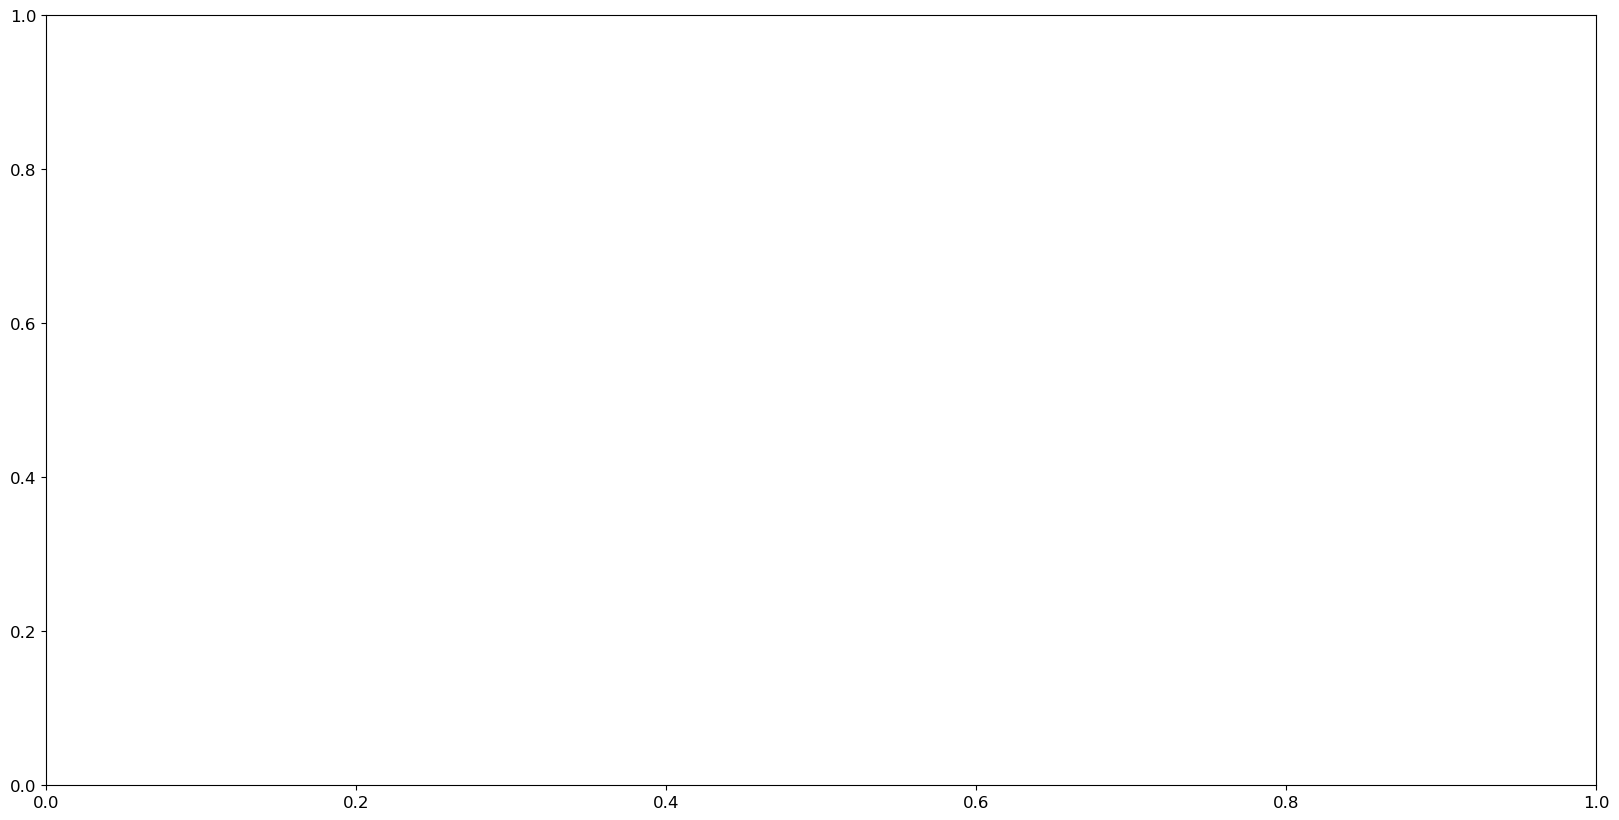

Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/distributed/nanny.py", line 990, in _run
    asyncio.run(run())
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/asyncio/runners.py", line 47, in run
    _cancel_all_tasks(loop)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/asyncio/runners.py", line 63, in _cancel_all_tasks
    loop.run_unt

In [11]:
fig,ax = plt.subplots(1,figsize = (20,10))

data = get_transect_data(vector,"blank-ttide-20","output012")

mov = Movie(data,plotvtransect,input_check = False)
mov.save("/g/data/v45/ab8992/dropbox/regional_movies/" + "transect-blanktides.mp4",overwrite_existing = True,parallel = True,parallel_compute_kwargs=dict(scheduler="processes", num_workers=28)) # ,

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/dask/base.py:1368: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3

Movie created at transect-mixed.mp4


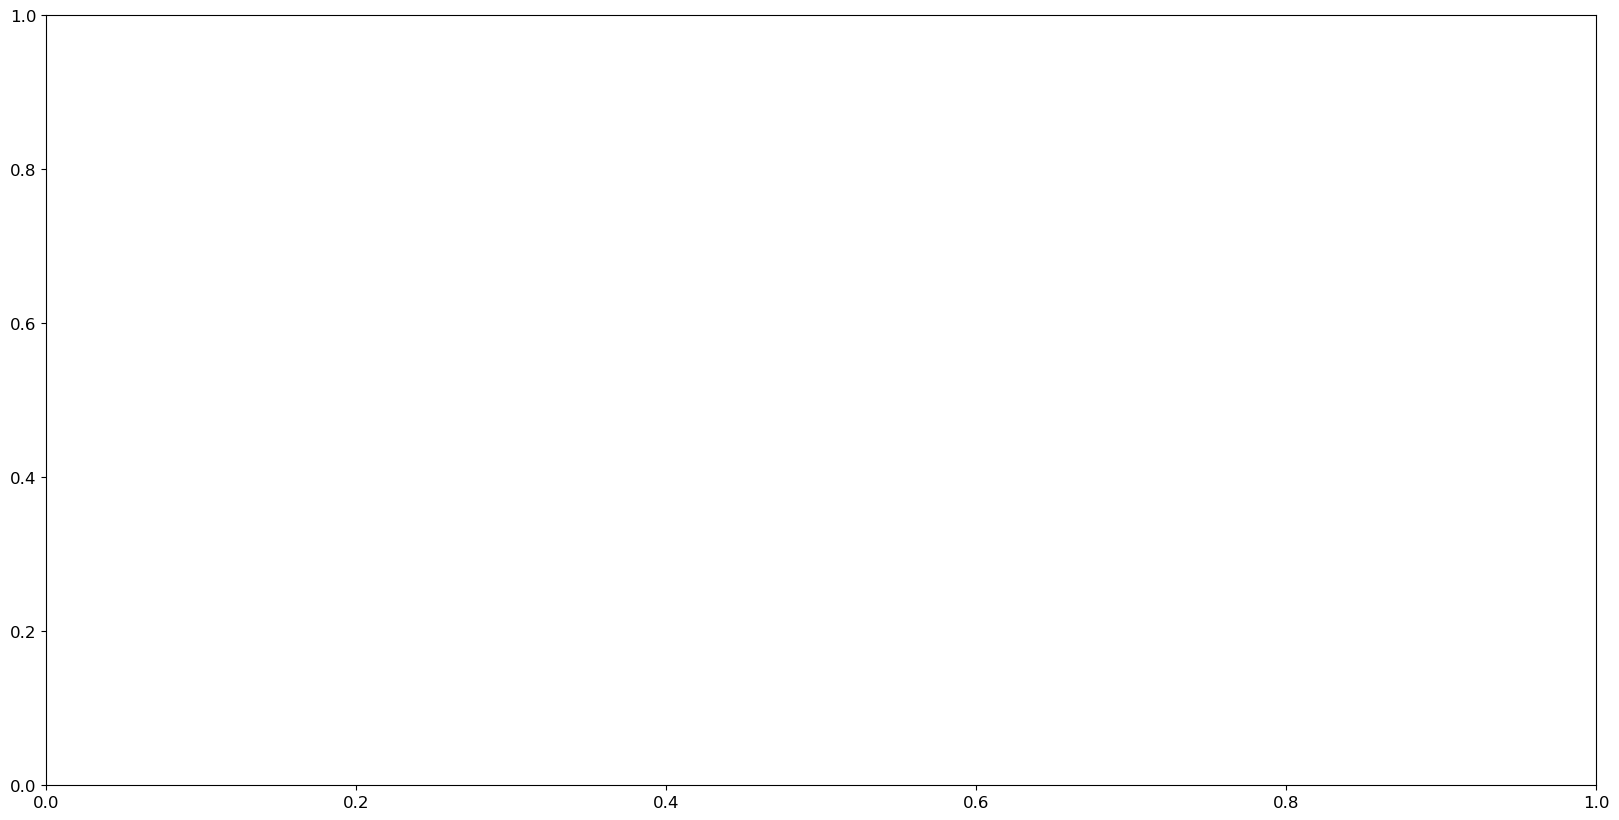

In [27]:
fig,ax = plt.subplots(1,figsize = (20,10))


data = get_transect_data(vector,"testtides-20","output010")

mov = Movie(data,plotvtransect,input_check = False)
mov.save("/g/data/v45/ab8992/dropbox/regional_movies/" + "transect-mixed.mp4",overwrite_existing = True,parallel = True,parallel_compute_kwargs=dict(scheduler="processes", num_workers=28)) # ,

## Movie of no tides

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/dask/base.py:1368: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3

Movie created at transect-notide.mp4


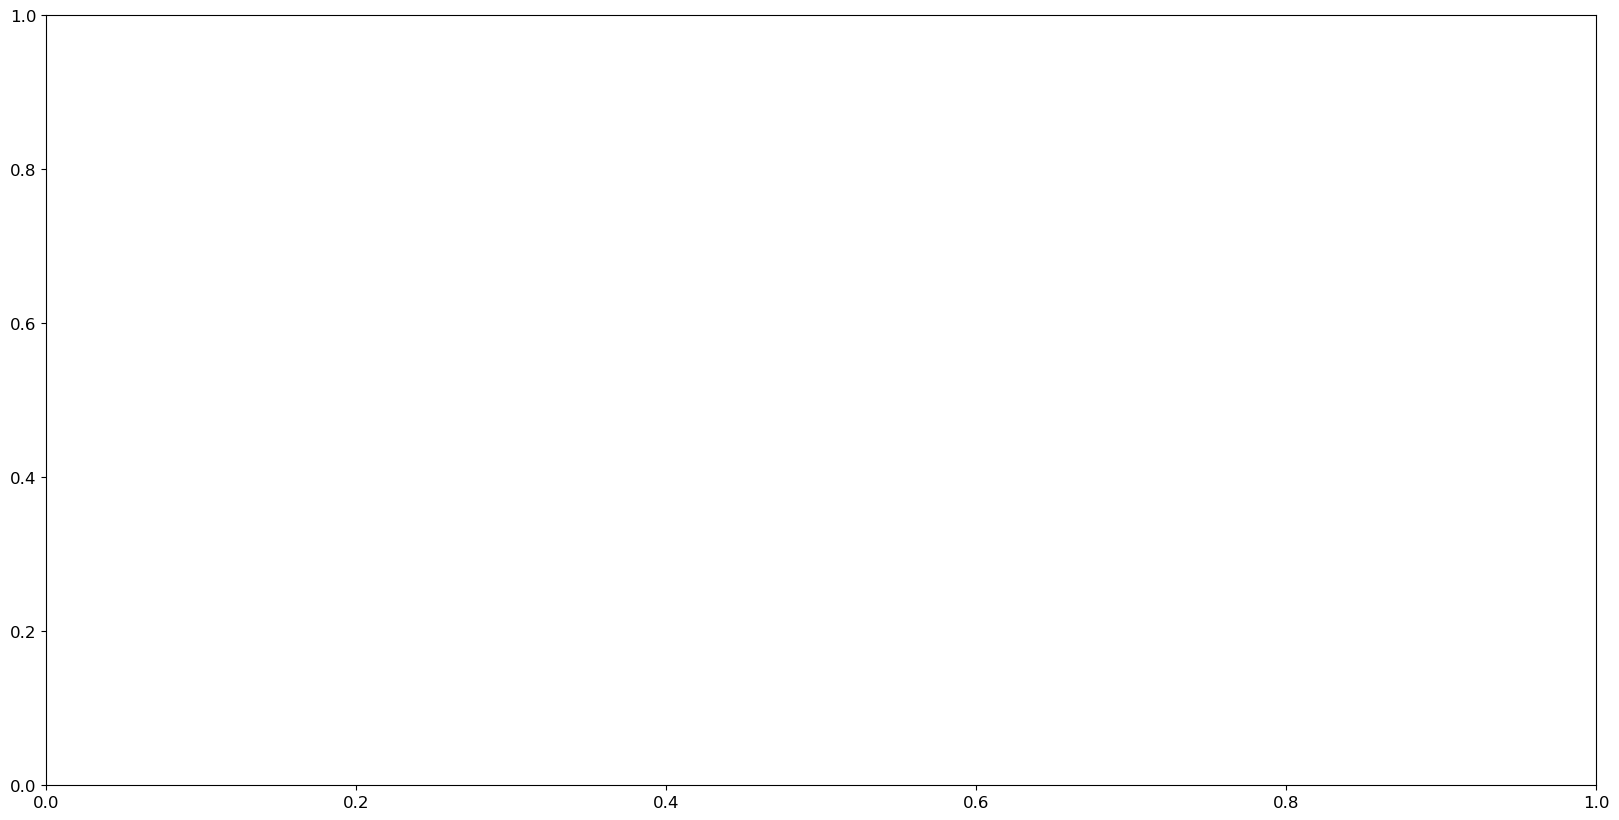

2023-07-25 01:54:54,002 - distributed.nanny - WARNING - Restarting worker
2023-07-25 01:54:54,084 - distributed.nanny - WARNING - Restarting worker
2023-07-25 01:54:54,390 - distributed.nanny - WARNING - Restarting worker
2023-07-25 01:54:55,398 - distributed.nanny - WARNING - Restarting worker


In [84]:
fig,ax = plt.subplots(1,figsize = (20,10))


data = get_transect_data(vector,"ttide-20","output011")

mov = Movie(data,plotvtransect,input_check = False)
mov.save("/g/data/v45/ab8992/dropbox/regional_movies/" + "transect-notide.mp4",overwrite_existing = True,parallel = True,parallel_compute_kwargs=dict(scheduler="processes", num_workers=28)) # ,

## Test double plot dimensions

Text(0.5, 1.0, 'Density along transect')

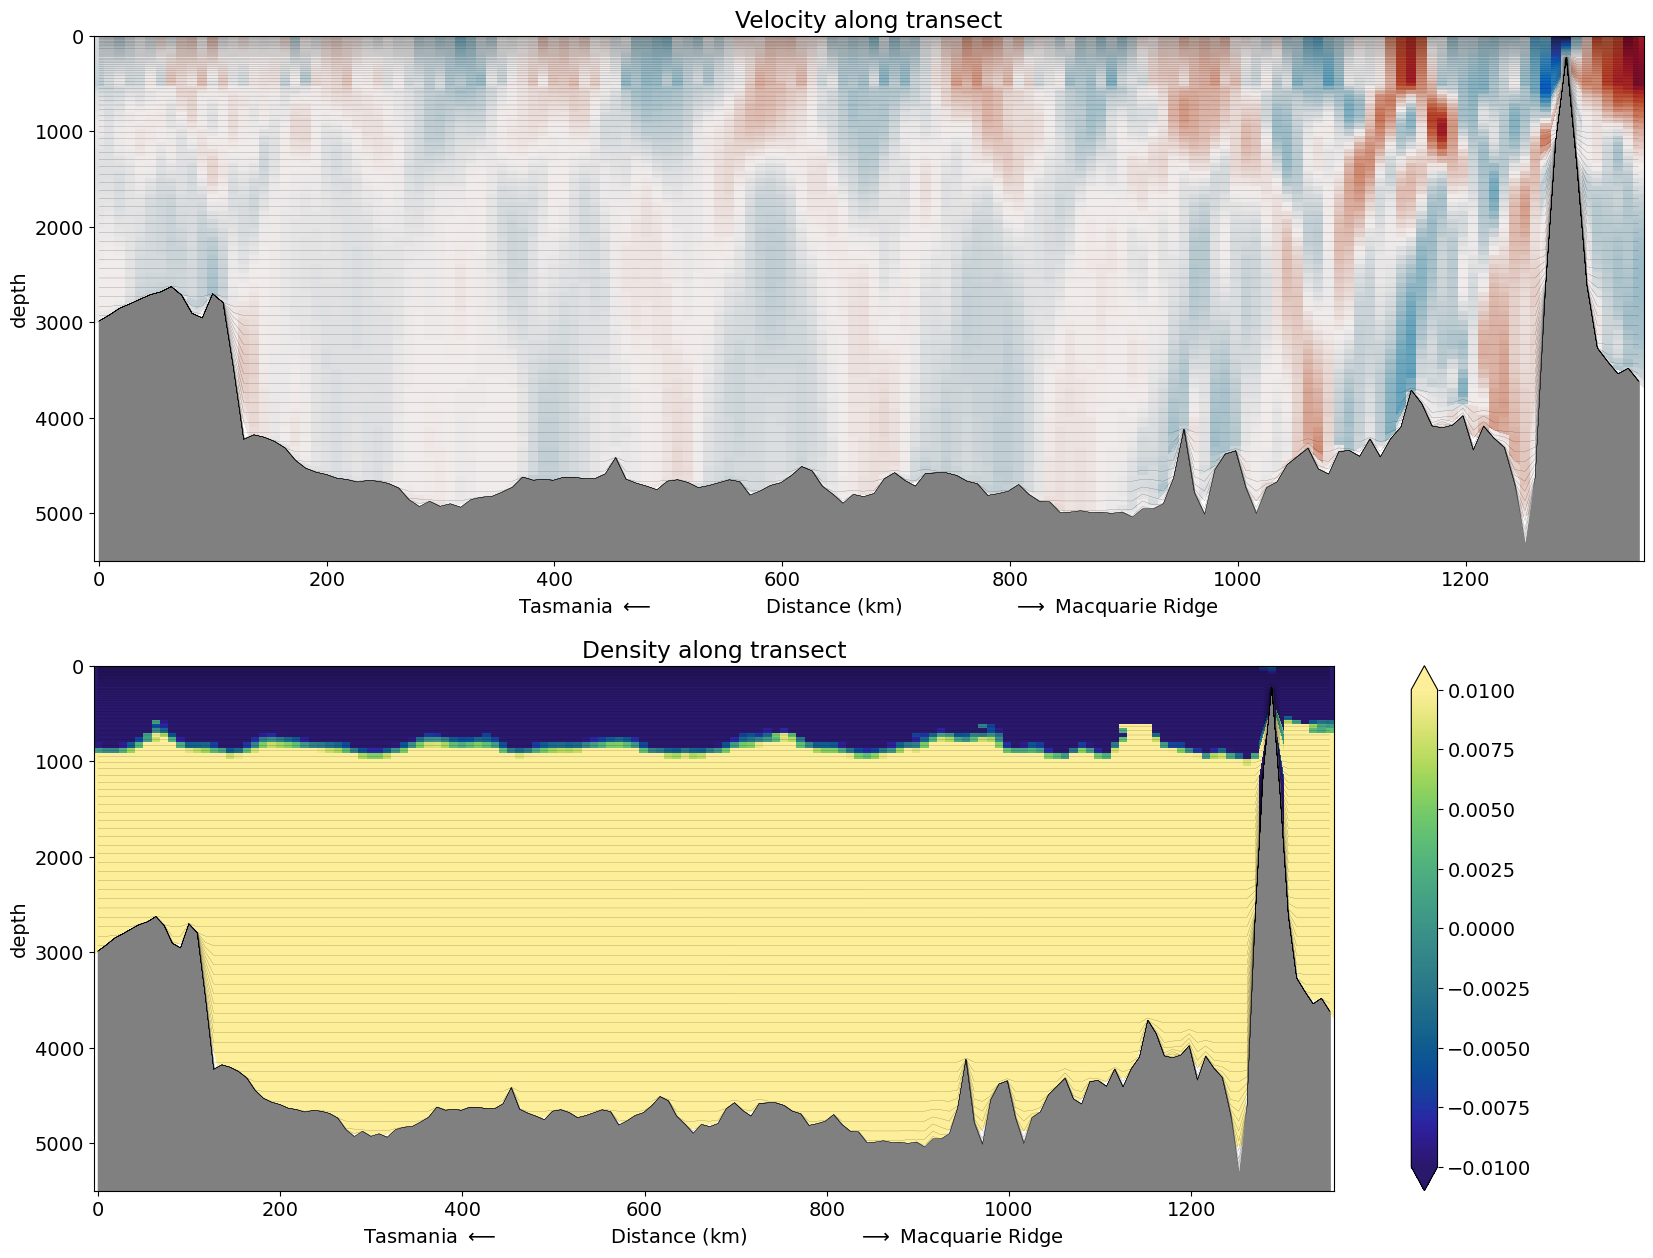

In [22]:
## Use Andy's code to modify u and put on new depth axis
%matplotlib inline
depth = h_transect.h.cumsum(dim='zl')
u_fixed = xr.DataArray(data=ul.values,dims=["time","zl", "l"],
        coords=dict(l=(["l"], ul.l.values),depth=(["time","zl", "l"], depth.values)),
        attrs= ul.attrs)
rho_fixed = xr.DataArray(data=rho_transect.values,dims=["time","zl", "l"],
        coords=dict(l=(["l"], rho_transect.l.values),depth=(["time","zl", "l"], depth.values)),
        attrs= rho_transect.attrs)

fig,ax = plt.subplots(2,figsize = (20,15))


u_fixed.isel(time = 25).plot(vmin = -0.4,vmax = 0.4,cmap = cm.balance,ax = ax[0],y = "depth",add_colorbar=False)

for ii in range(h_transect.h.shape[1] - 1):
    ax[0].plot(u_fixed.l.values,depth[25,ii,:],'black',linewidth=0.1)

ax[0].fill_between(u_fixed.l.values,depth[25,-1,:],5500,color = "gray")
ax[0].set_ylim(0,5500)
ax[0].invert_yaxis()
ax[0].set_xlabel(r"Tasmania $\longleftarrow $                  Distance (km)                  $\longrightarrow $ Macquarie Ridge")
ax[0].set_title("Velocity along transect")

rho_fixed.isel(time = 25).plot(cmap = cm.haline,ax = ax[1],y = "depth",vmin = -0.01,vmax = 0.01)

for ii in range(h_transect.h.shape[1] - 1):
    ax[1].plot(rho_fixed.l.values,depth[25,ii,:],'black',linewidth=0.1)

ax[1].fill_between(rho_fixed.l.values,depth[25,-1,:],5500,color = "gray")
ax[1].set_ylim(0,5500)
ax[1].invert_yaxis()
ax[1].set_xlabel(r"Tasmania $\longleftarrow $                  Distance (km)                  $\longrightarrow $ Macquarie Ridge")
ax[1].set_title("Density along transect")

## Make Hovmollers of our transects with same data as movies

Text(0.5, 1.0, 'Hovmöller plot of interfacial height anomolies')

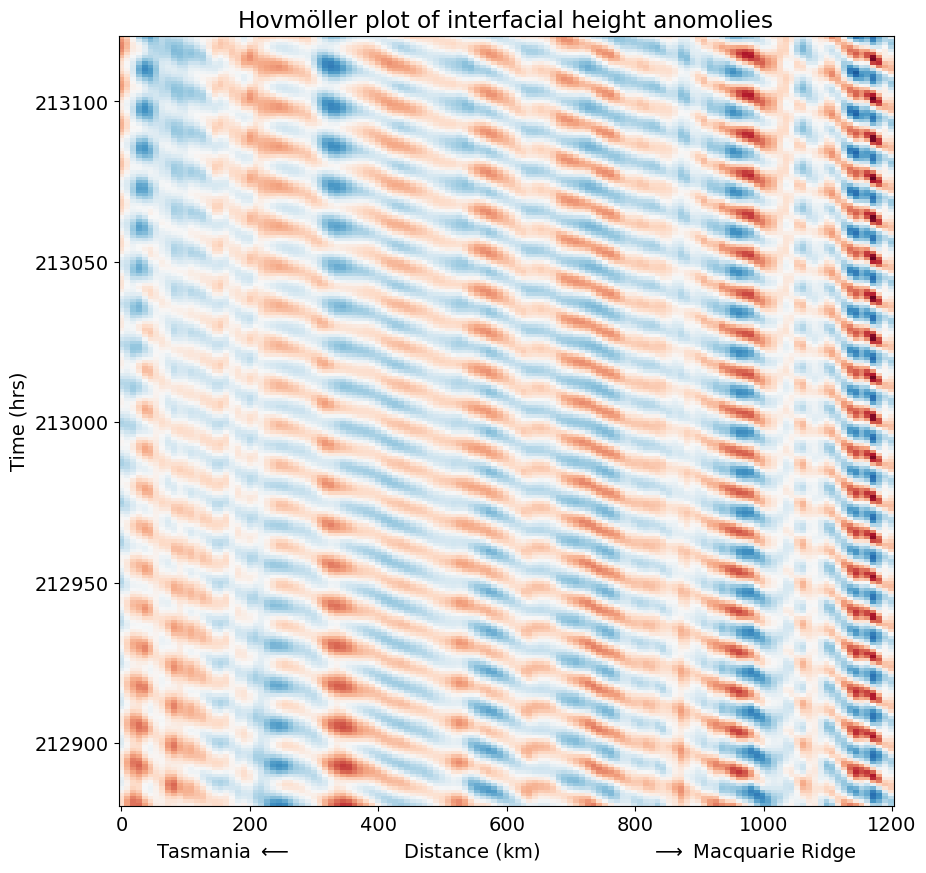

In [13]:
fig,ax = plt.subplots(1,figsize = (10,10))
data = get_transect_data(vector,"testtides-20","output010")

(data.isop_transect.isel(rho2_i = 30) - data.isop_transect.isel(rho2_i = 30).mean("time")).sel(l = slice(0,1200)).plot(ax = ax,add_colorbar = False)
ax.set_ylabel("Time (hrs)")
ax.set_xlabel(r"Tasmania $\longleftarrow $                  Distance (km)                  $\longrightarrow $ Macquarie Ridge")
ax.set_title("Hovmöller plot of interfacial height anomolies")

Text(0.5, 1.0, 'Hovmöller plot of interfacial height anomolies')

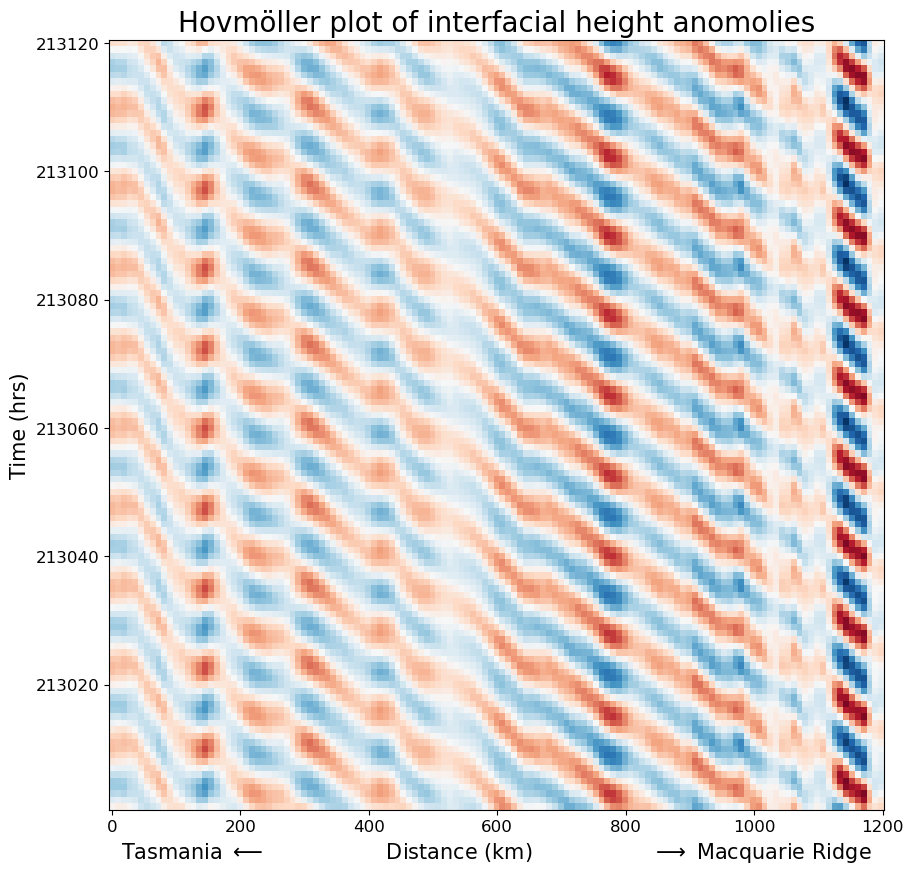

In [9]:
fig,ax = plt.subplots(1,figsize = (10,10))
data = get_transect_data(vector,"blank-ttide-20","output012")

(data.isop_transect.isel(rho2_i = 30) - data.isop_transect.isel(rho2_i = 30).mean("time")).sel(l = slice(0,1200)).plot(ax = ax,add_colorbar = False)
ax.set_ylabel("Time (hrs)")
ax.set_xlabel(r"Tasmania $\longleftarrow $                  Distance (km)                  $\longrightarrow $ Macquarie Ridge")
ax.set_title("Hovmöller plot of interfacial height anomolies")

## Hovmoller for no tides

Text(0.5, 1.0, 'Hovmöller plot of interfacial height')

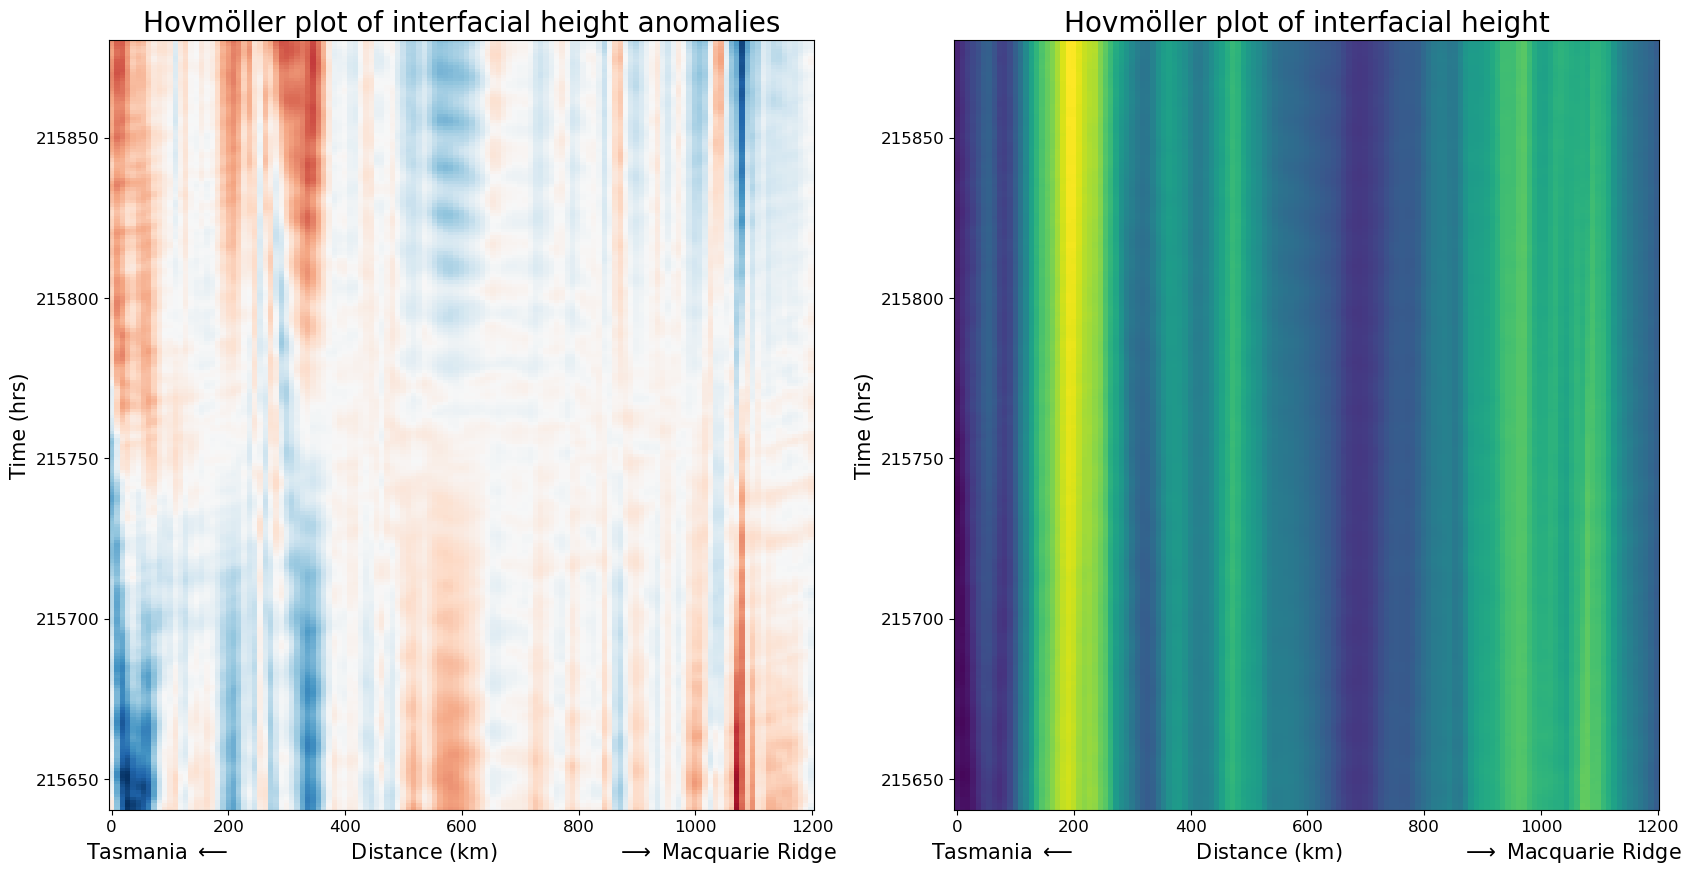

In [12]:
fig,ax = plt.subplots(1,2,figsize = (20,10))
# data = get_transect_data(vector,"ttide-20","output011")
(data.isop_transect.isel(rho2_i = 30) - data.isop_transect.isel(rho2_i = 30).mean("time")).sel(l = slice(0,1200)).plot(ax = ax[0],add_colorbar = False)
ax[0].set_ylabel("Time (hrs)")
ax[0].set_xlabel(r"Tasmania $\longleftarrow $                  Distance (km)                  $\longrightarrow $ Macquarie Ridge")
ax[0].set_title("Hovmöller plot of interfacial height anomalies")

(data.isop_transect.isel(rho2_i = 30)).sel(l = slice(0,1200)).plot(ax = ax[1],add_colorbar = False)
ax[1].set_ylabel("Time (hrs)")
ax[1].set_xlabel(r"Tasmania $\longleftarrow $                  Distance (km)                  $\longrightarrow $ Macquarie Ridge")
ax[1].set_title("Hovmöller plot of interfacial height")

## Spectra of velocity along transects

In [97]:
data = get_transect_data(vector,"ttide-20","011")


['']


2023-07-27 00:40:02,790 - distributed.worker - WARNING - Compute Failed
Key:       open_dataset-7cb26d68-a65b-4add-a88b-8f0004ec7f4b
Function:  execute_task
args:      ((<function apply at 0x15502967c820>, <function open_dataset at 0x1550111dd4c0>, [''], (<class 'dict'>, [['engine', None], ['chunks', 'auto'], ['decode_times', False]])))
kwargs:    {}
Exception: 'ValueError("did not find a match in any of xarray\'s currently installed IO backends [\'netcdf4\', \'h5netcdf\', \'scipy\', \'cfgrib\', \'cfradial1\', \'furuno\', \'gamic\', \'gini\', \'iris\', \'odim\', \'pydap\', \'radolan\', \'rainbow\', \'rasterio\', \'wradlib-cfradial1\', \'wradlib-cfradial2\', \'wradlib-furuno\', \'wradlib-gamic\', \'wradlib-iris\', \'wradlib-odim\', \'wradlib-rainbow\', \'zarr\']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:\\nhttps://docs.xarray.dev/en/stable/getting-started-guide/installing.html\\nhttps://docs.xa

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'cfradial1', 'furuno', 'gamic', 'gini', 'iris', 'odim', 'pydap', 'radolan', 'rainbow', 'rasterio', 'wradlib-cfradial1', 'wradlib-cfradial2', 'wradlib-furuno', 'wradlib-gamic', 'wradlib-iris', 'wradlib-odim', 'wradlib-rainbow', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [4]:
data

<xarray.Dataset>
Dimensions:        (zl: 100, time: 240, l: 150, rho2_i: 80)
Coordinates:
  * zl             (zl) float64 2.704 8.126 13.58 ... 5.339e+03 5.696e+03
  * time           (time) float64 2.156e+05 2.156e+05 ... 2.159e+05 2.159e+05
    xh             (l) float64 dask.array<chunksize=(150,), meta=np.ndarray>
    yh             (l) float64 dask.array<chunksize=(150,), meta=np.ndarray>
  * l              (l) float64 0.0 9.074 18.15 ... 1.334e+03 1.343e+03 1.352e+03
  * rho2_i         (rho2_i) float64 1.036e+03 1.036e+03 ... 1.037e+03 1.037e+03
    depth          (time, zl, l) float64 dask.array<chunksize=(1, 100, 150), meta=np.ndarray>
Data variables:
    h_transect     (time, zl, l) float64 dask.array<chunksize=(1, 100, 150), meta=np.ndarray>
    isop_transect  (time, rho2_i, l) float64 dask.array<chunksize=(1, 80, 150), meta=np.ndarray>
    u_newz         (time, zl, l) float64 dask.array<chunksize=(1, 100, 150), meta=np.ndarray>

In [3]:
data.to_netcdf("/g/data/v45/ab8992/ttideoutputs/preliminary/transects/notides-output011")

In [5]:
e_point_notide = (data.isop_transect.isel(rho2_i = 50) - data.isop_transect.isel(rho2_i = 50).mean("time")).drop("xh").drop("yh").isel(l = 50).load()
u_point_notide = (data.u_newz.isel(zl = 50) - data.u_newz.isel(zl = 50).mean("time")).drop("xh").drop("yh").drop("depth").isel(l = 50).load()
N2 = xr.open_mfdataset("/home/149/ab8992/mom6_rundirs/ttide/testtides-20/archive/output011/*daily_N2.nc",decode_times = False, chunks = "auto").sel(xh = slice(145,175),yh = slice(-52,-30)).isel(time = 0,nv = 1).load()


/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


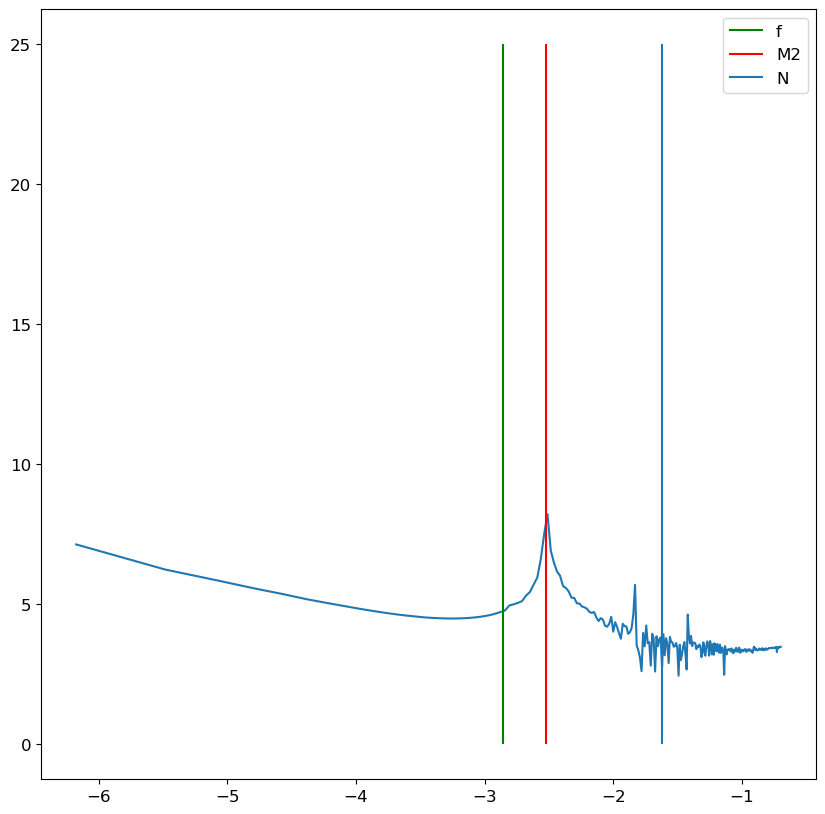

In [92]:
import xrft
fig,ax = plt.subplots(1,figsize = (10,10))
E = xrft.fft(e_point,dim="time",true_amplitude=True,true_phase=True)
# U = xrft.fft(u_point,dim="time",true_amplitude=True,true_phase=True)
# U = np.fft.fft(u_point.values)
plt.plot(np.log(E.freq_time),np.abs(np.log(E)))

m2 = 12.5
f = 0.0001 * 3600 / (np.pi * 2)
N = np.sqrt(N2.subML_N2.sel(xh = 150,yh = -43,method = "nearest").values * 3600)
ax.vlines(np.log(f),0,25,label = "f",color = "green")
ax.vlines(np.log(1/m2),0,25,label = "M2",color = "red")
ax.vlines(np.log(N),0,25,label = "N")
ax.legend()
# plt.xlim(0,None)

## notide spectra


/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


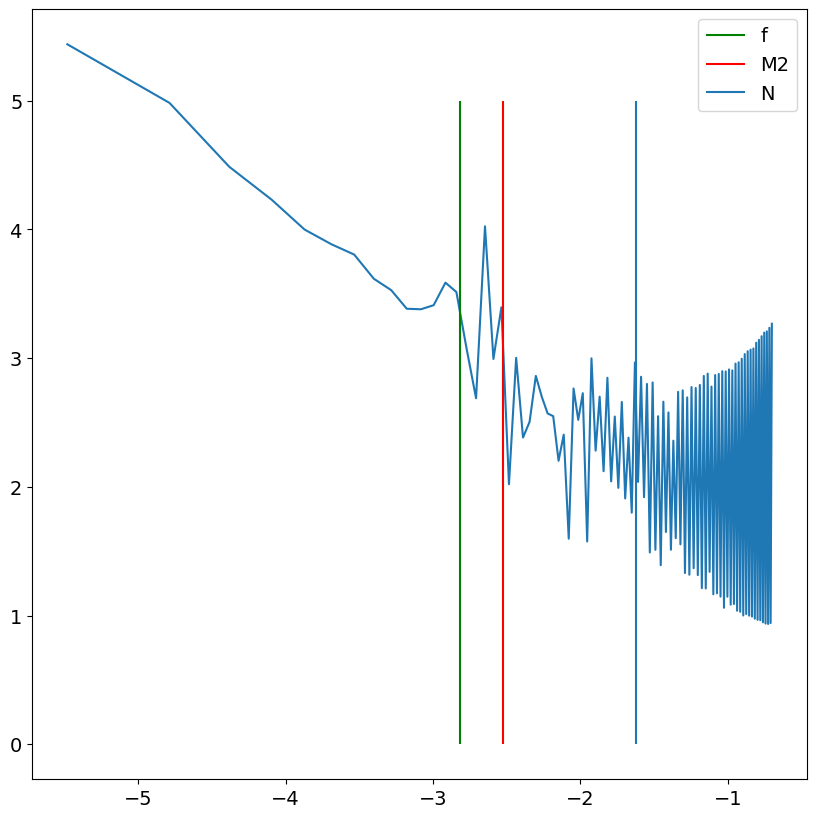

In [11]:
import xrft
fig,ax = plt.subplots(1,figsize = (10,10))
E = xrft.fft(e_point_notide,dim="time",true_amplitude=True,true_phase=True)
# U = xrft.fft(u_point,dim="time",true_amplitude=True,true_phase=True)
# U = np.fft.fft(u_point.values)
plt.plot(np.log(E.freq_time),np.abs(np.log(E)))

m2 = 12.5
f = 0.000104 * 3600 / (np.pi * 2)
# f = 0.000652 * 3600
N = np.sqrt(N2.subML_N2.sel(xh = 150,yh = -43,method = "nearest").values * 3600)
ax.vlines(np.log(f),0,5,label = "f",color = "green")
ax.vlines(np.log(1/m2),0,5,label = "M2",color = "red")
ax.vlines(np.log(N),0,5,label = "N")
ax.legend()
# plt.xlim(0,None)